In [1]:
from sage.all import matrix  # testing
from sage.all import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import os
import pwlf
import os
from surface_dynamics.all import *
import math
from time import time
import copy
from scipy import integrate
import traceback
import dill
import sys
import unittest
from surface_dynamics.all import Origami
from utils import load_arrays_from_file  # testing
from fractions import Fraction as frac
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
from sympy import Rational, sqrt
from Library import *
from Library import Section

number of vecs: 11928828
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
length of alphas: 10
i = 0 j = 7
top done: 18.906278371810913
side done: 18.92846369743347
diagonal done: 19.124346256256104
[array([[1/2],
       [1]], dtype=object), array([[25/2],
       [1]], dtype=object), array([[23/2],
       [1]], dtype=object), array([[21],
       [2]], dtype=object), array([[61/2],
       [3]], dtype=object), array([[20],
       [2]], dtype=object), array([[19/2],
       [1]], dtype=object), array([[17/2],
       [1]], dtype=object), array([[15/2],
       [1]], dtype=object), array([[13],
       [2]], dtype=object), array([[37/2],
       [3]], dtype=object), array([[59/2],
       [5]], dtype=object), 

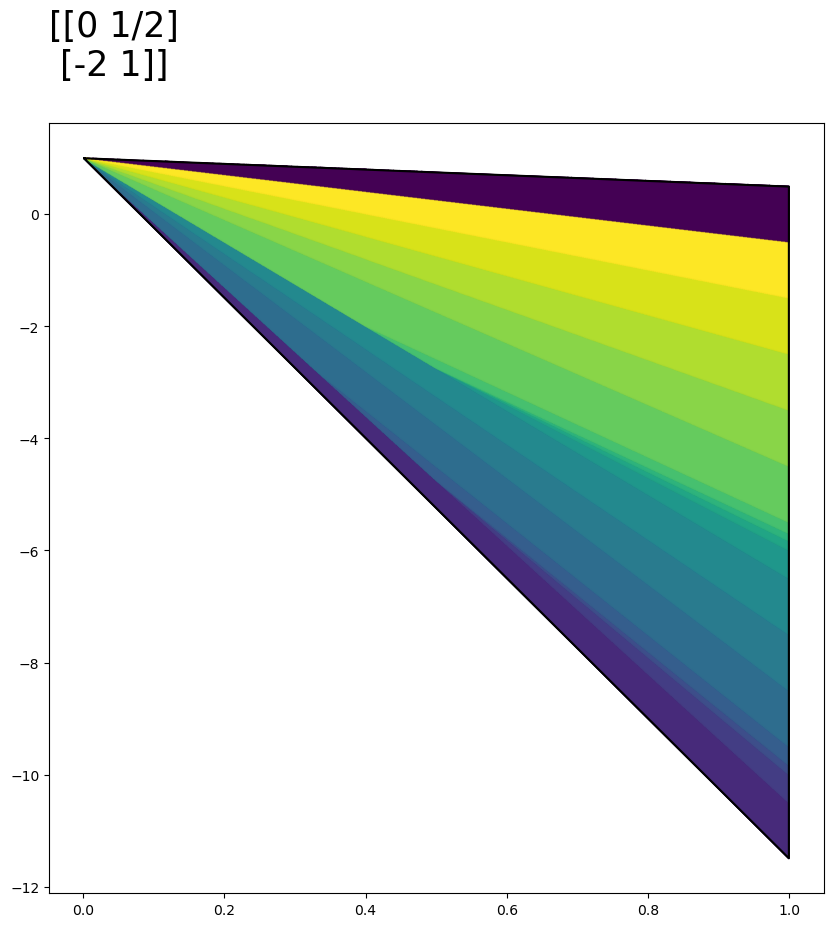

<Figure size 640x480 with 0 Axes>

length of inputs: 500, 500


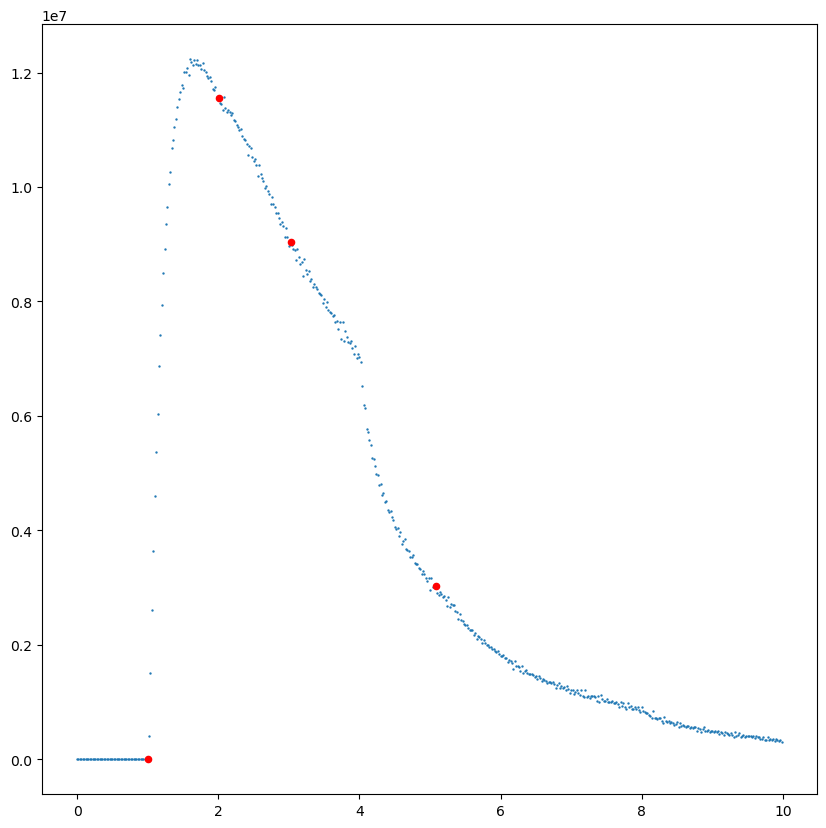

section done
i = 0 j = 8
top done: 20.501415252685547
side done: 19.641732692718506
diagonal done: 20.321692943572998
[array([[1],
       [1]], dtype=object), array([[8],
       [1]], dtype=object), array([[7],
       [1]], dtype=object), array([[6],
       [1]], dtype=object), array([[5],
       [1]], dtype=object), array([[8],
       [2]], dtype=object), array([[7],
       [2]], dtype=object), array([[6],
       [2]], dtype=object), array([[8],
       [3]], dtype=object), array([[5],
       [2]], dtype=object), array([[2],
       [1]], dtype=object)]
[array([[1.],
       [1.]]), array([[8.],
       [1.]]), array([[7.],
       [1.]]), array([[6.],
       [1.]]), array([[5.],
       [1.]]), array([[8.],
       [2.]]), array([[7.],
       [2.]]), array([[6.],
       [2.]]), array([[8.],
       [3.]]), array([[5.],
       [2.]]), array([[2.],
       [1.]])]
[[1.0*x + 1.0*y]
 [-t*(1.0*x + 1.0*y) + 1.0/x]]
[[8.0*x + 1.0*y]
 [-t*(8.0*x + 1.0*y) + 1.0/x]]
[[7.0*x + 1.0*y]
 [-t*(7.0*x + 1.0*y

<Figure size 640x480 with 0 Axes>

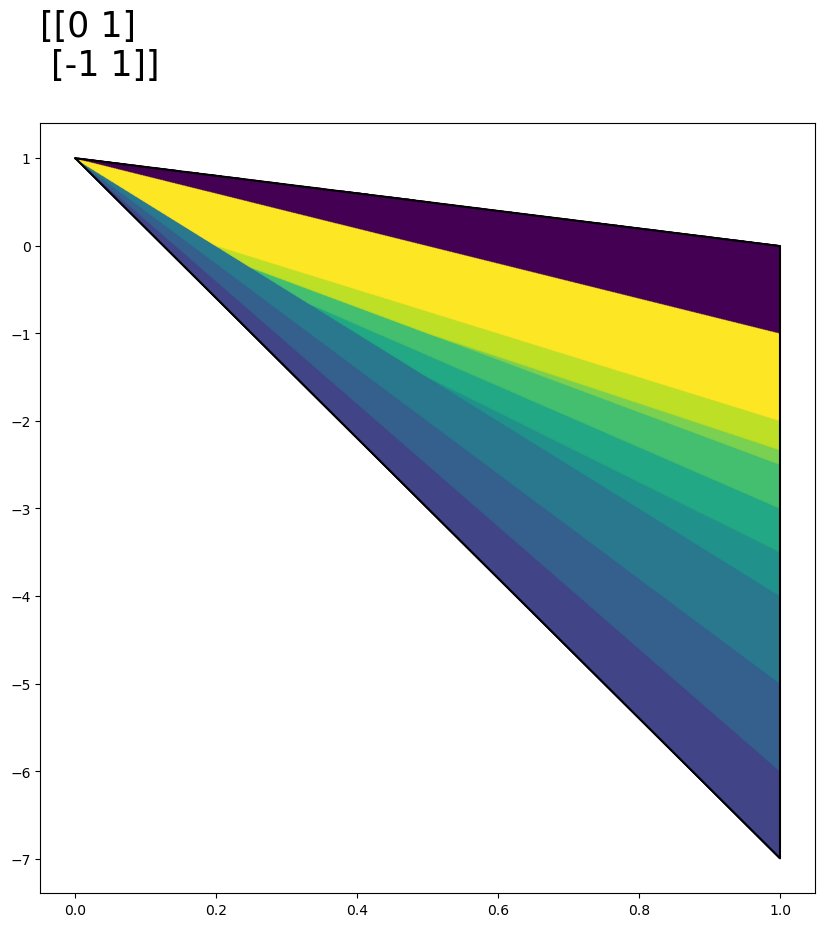

<Figure size 640x480 with 0 Axes>

length of inputs: 500, 500


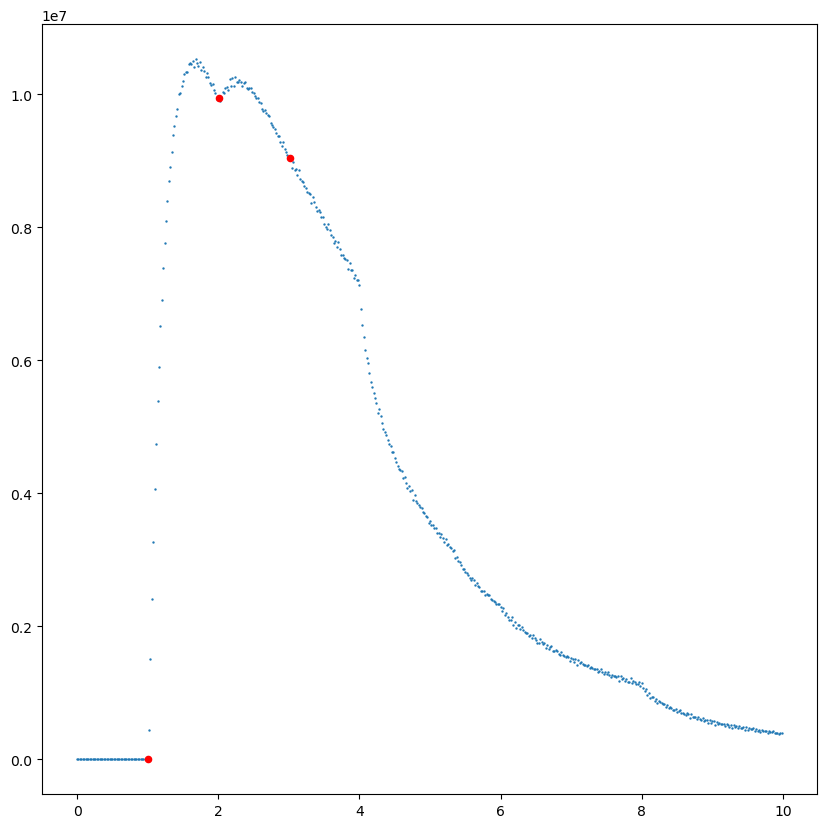

section done
i = 0 j = 9
top done: 19.033610820770264
side done: 19.35155177116394
diagonal done: 19.115854501724243
[array([[2/5],
       [1]], dtype=object), array([[37/5],
       [1]], dtype=object), array([[64/5],
       [2]], dtype=object), array([[91/5],
       [3]], dtype=object), array([[59/5],
       [2]], dtype=object), array([[27/5],
       [1]], dtype=object), array([[22/5],
       [1]], dtype=object), array([[34/5],
       [2]], dtype=object), array([[15],
       [5]], dtype=object), array([[29/5],
       [2]], dtype=object), array([[12/5],
       [1]], dtype=object), array([[7/5],
       [1]], dtype=object)]
[array([[0.4],
       [1. ]]), array([[7.4],
       [1. ]]), array([[12.8],
       [ 2. ]]), array([[18.2],
       [ 3. ]]), array([[11.8],
       [ 2. ]]), array([[5.4],
       [1. ]]), array([[4.4],
       [1. ]]), array([[6.8],
       [2. ]]), array([[15.],
       [ 5.]]), array([[5.8],
       [2. ]]), array([[2.4],
       [1. ]]), array([[1.4],
       [1. ]])]
[[0

<Figure size 640x480 with 0 Axes>

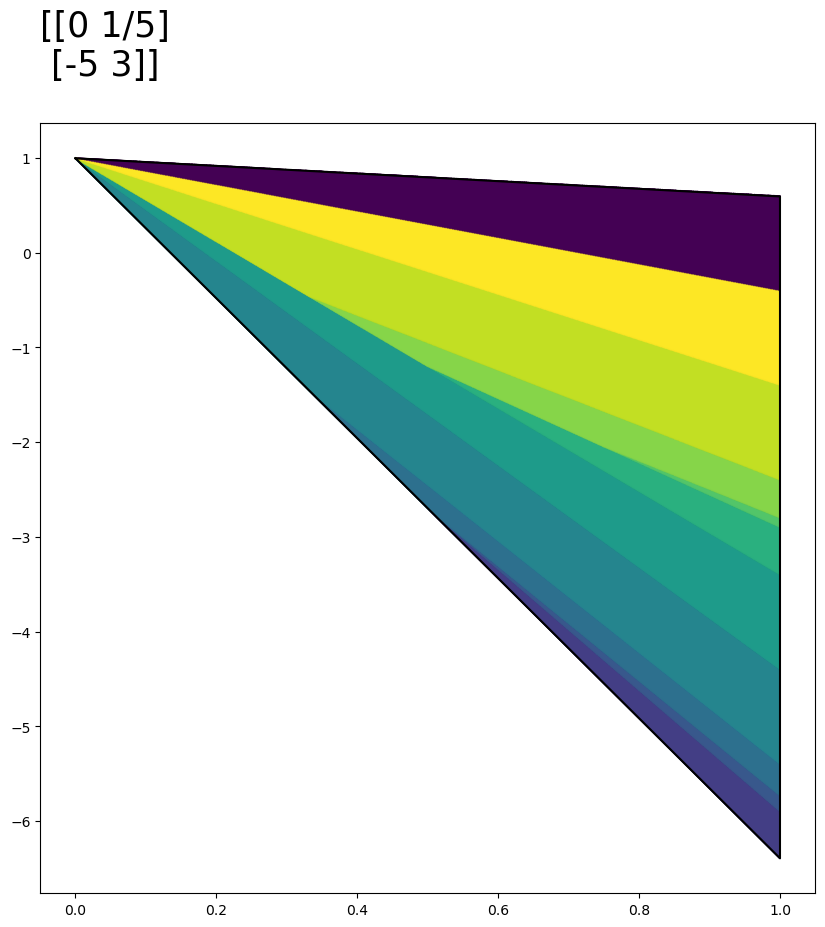

<Figure size 640x480 with 0 Axes>

length of inputs: 500, 500


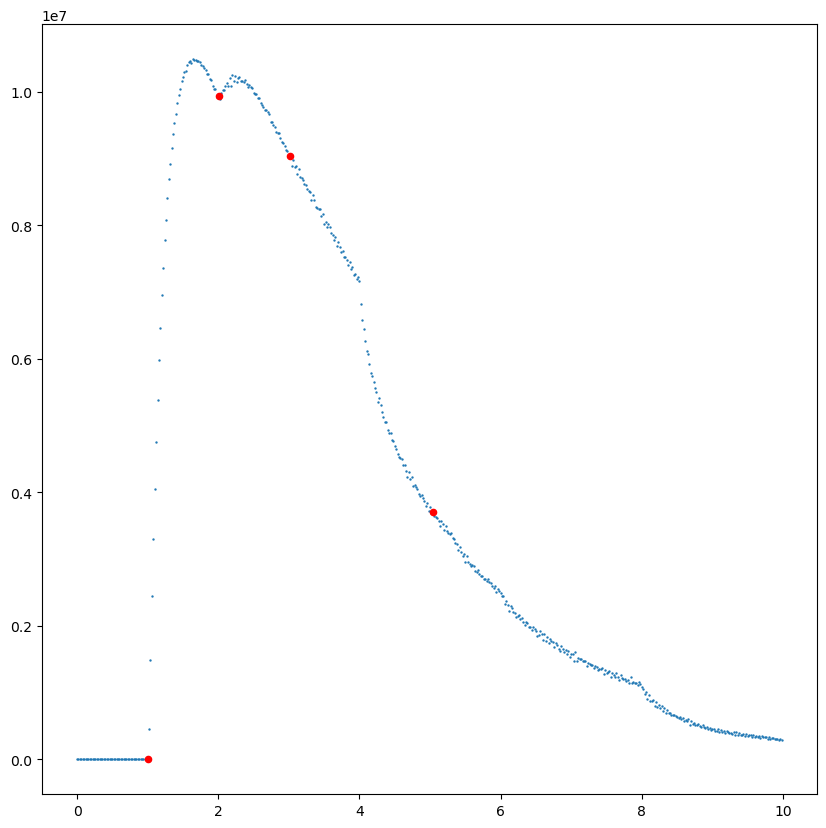

section done


<Figure size 640x480 with 0 Axes>

In [2]:
# number of squares for STS
n_squares = 7
# index to start at
index = 0

permutations = perms_list(n_squares)

perm = permutations[index]

# get a list of saddle connections
vec_file = "vecs" + str(n_squares) + "-" + str(index) + ".npy"
vecs0 = load_arrays_from_file(os.path.join("vecs", vec_file))

print(f'number of vecs: {len(vecs0)}')

# generate a list of alpha, c matrices, and eigenvectors for each cusp of the STS to experiment with to find "nice" sections for our poincare sections
a = []
c = []
e = []
g = []
for num in range(10):
    try:
        gs = generators(perm, vecs0)
        alphas, Cs, Ss, eigs, Ms, gens, eigenvecs = poincare_details2(perm, vecs0, gs)
        print(alphas)
    except Exception as e:
        print(e)
        continue
    a.append(alphas)
    c.append(Cs)
    e.append(eigenvecs)
    g.append(generators)
print(f'length of alphas: {len(a)}')

# write these values to a file
data = [a, c, e, g]
with open(os.path.join("results", f"{n_squares} - {index}", "setup.dill"), 'wb') as f:
    dill.dump(data, f)

dx = 0.0005
covolume_list = []

# go thorugh all cusps
for j in range(len(a[0])):
    if j < 7:
        continue

    # change back to False in future
    improved = True
    if j == 0:
        improved = True

    for i in range(len(a)):

        # get dimensions of section
        vecs, x_vals, m0, m1, x0, y0, dx_y, z = setup(
            a[i][j], c[i][j], e[i][j], vecs0, dx, improved)
        print("i = " + str(i), "j = " + str(j))

        if float(z) <= float(1/50000):
            print("too small")
            continue

        # create a dataframe with winning vector at certain points in the section
        df = winners1(vecs, x_vals, m0, m1, y0, dx, dx_y)

        # plot poincare section and save
        plot(df, vecs, c[i][j], j, n_squares, index, test=False)
        
        df.to_csv(os.path.join(
            "results", f"{n_squares} - {index}", "df - " + str(j)), index=False)

        # make section object that define winning vector and line equations for boundaries of subsections
        sec_list = sec_setup(df, dx_y)
        secs = sec_comp(sec_list, dx)
        with open(os.path.join("results", f"{n_squares} - {index}", "secs - " + str(j) + ".dill"), 'wb') as f:
            dill.dump(secs, f)

        times = [1]
        if improved:
            times = time_comp(secs)

        # plot the pdf for each cusp
        pdf(list(df["time"]), times, dx*2, n_squares, index, j)

        # get covolume calculations
        #covolume_list.append(covolume(secs))
        print("section done")

        break

# with open(os.path.join("results", f"{n_squares} - {index}", "covolume.txt"), "w") as file:
#     total = 0
#     for item in covolume_list:
#         total += item
#         file.write(str(item) + "\n")
#     file.write("\n" + str(total))

In [5]:
covolume_list.append(covolume(secs))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/mambaforge/envs/flatsurf/lib/python3.9/site-packages/sympy/core/assumptions.py", line 499, in getit
    return self._assumptions[fact]
KeyError: 'zero'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/mambaforge/envs/flatsurf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_200147/1516405700.py", line 1, in <module>
    covolume_list.append(covolume(secs))
  File "/home/mlbeers/MXM/Poincare_Sections/Library.py", line 1103, in covolume
    return sum
  File "/usr/local/mambaforge/envs/flatsurf/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py", line 775, in dblquad
    return nquad(func, [temp_ranges, [a, b]], args=args,
  File "/usr/local/mambaforge/envs/flatsurf/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py", line 1179, in

In [4]:
i = 0
j = 0

# number of squares for STS
n_squares = 7
# index to start at
index = 0

permutations = perms_list(n_squares)

perm = permutations[index]

# get a list of saddle connections
vec_file = "vecs" + str(n_squares) + "-" + str(index) + ".npy"
vecs0 = load_arrays_from_file(os.path.join("vecs", vec_file))

print(f'number of vecs: {len(vecs0)}')

# generate a list of alpha, c matrices, and eigenvectors for each cusp of the STS to experiment with to find "nice" sections for our poincare sections
a = []
c = []
e = []
g = []
for num in range(10):
    try:
        gs = generators(perm, vecs0)
        alphas, Cs, Ss, eigs, Ms, gens, eigenvecs = poincare_details2(perm, vecs0, gs)
        print(alphas)
    except Exception as e:
        print(e)
        continue
    a.append(alphas)
    c.append(Cs)
    e.append(eigenvecs)
    g.append(generators)
print(f'length of alphas: {len(a)}')

# write these values to a file
data = [a, c, e, g]
with open(os.path.join("results", f"{n_squares} - {index}", "setup.dill"), 'wb') as f:
    dill.dump(data, f)

dx = 0.0005
covolume_list = []

improved = True
if j == 0:
    improved = True

vecs, x_vals, m0, m1, x0, y0, dx_y, z = setup(a[i][j], c[i][j], e[i][j], vecs0, dx, improved)
print("i = " + str(i), "j = " + str(j))

if float(z) <= float(1/50000):
    print("too small")

number of vecs: 11928828
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
[2, 1, 4, 2, 6, 3, 5/2, 12, 7, 7]
length of alphas: 10
i = 0 j = 0


In [16]:
# dictionary for plotting
saddle_dict = {}
saddle_dict["x"] = []
saddle_dict["y"] = []
saddle_dict["lab"] = []
saddle_dict["vec"] = []
saddle_dict["time"] = []
possible_vecs = []
winners = []
dz = 1 / 100
vecs2 = np.hstack([arr.astype(float) for arr in vecs])  # Ensure all are float64
vecs1 = np.hstack(vecs)  # Keep the original structure for output if needed

In [19]:
# top edge
# Stack list of numpy arrays into a single 2D array
t0 = time()
for a in np.arange(dz, 1, dz):
    # Matrix stays outside the inner loop
    Mab = np.array([[a, m0*a + int(1)/y0 - dx_y], [int(0), a]], dtype = 'float')

    new_vecs = Mab @ vecs2
    print(5)

    x_comps = new_vecs[0, :]
    y_comps = new_vecs[1, :]

    # Filter based on conditions (x > 0, y/x > 0, and x <= 1)
    valid_mask = (x_comps > 0) & (x_comps <= 1) & (y_comps / np.where(x_comps == 0,np.inf, x_comps) > 0)

    valid_x = x_comps[valid_mask]
    valid_y = y_comps[valid_mask]
    # Apply the mask to filter valid vectors
    valid_vecs = vecs1[:, valid_mask]

    if valid_x.size == 0:
        winners.append(None)
        continue

    # Calculate slopes
    slopes = valid_y / valid_x

    # Find the minimum slope and handle continuity cases
    min_slope_idx = np.argmin(slopes)
    winner_slope = slopes[min_slope_idx]
    winner = valid_vecs[:, min_slope_idx]

    # Handle continuity by finding the smallest vector if slopes are close
    for i, slope in enumerate(slopes):
        if np.abs(slope - winner_slope) <= dx / 1000:
            if valid_vecs[0, i] < winner[0] or valid_vecs[1, i] < winner[1]:
                winner = valid_vecs[:, i]

    winners.append(winner.reshape(2, 1))
t1 = time()
print("top done: " + str(t1 - t0))

# side edge
t0 = time()
y_vals = np.arange(m1 + 1/y0 + dx_y, m0 +
                   1/y0 - dx_y, dz*(m0-m1))
for b in y_vals:
    Mab = np.array([[1 - dx, b], [0, 1-dx]])
    # Apply the transformation to all vectors at once
    new_vecs = Mab @ vecs1

    x_comps = new_vecs[0, :]
    y_comps = new_vecs[1, :]

    # Filter based on conditions (x > 0, y/x > 0, and x <= 1)
    valid_mask = (x_comps > 0) & (x_comps <= 1) & (y_comps / np.where(x_comps == 0,np.inf, x_comps) > 0)

    valid_x = x_comps[valid_mask]
    valid_y = y_comps[valid_mask]
    # Apply the mask to filter valid vectors
    valid_vecs = vecs[:, valid_mask]

    if valid_x.size == 0:
        winners.append(None)
        continue

    # Calculate slopes
    slopes = valid_y / valid_x

    # Find the minimum slope and handle continuity cases
    min_slope_idx = np.argmin(slopes)
    winner_slope = slopes[min_slope_idx]
    winner = valid_vecs[:, min_slope_idx]

    # Handle continuity by finding the smallest vector if slopes are close
    for i, slope in enumerate(slopes):
        if np.abs(slope - winner_slope) <= dx / 1000:
            if valid_vecs[0, i] < winner[0] or valid_vecs[1, i] < winner[1]:
                winner = valid_vecs[:, i]
    winners.append(winner.reshape(2, 1))
t1 = time()
print("side done: " + str(t1 - t0))

# diagonal
t0 = time()
for a in np.arange(0 + dz, 1, dz):
    Mab = np.array([[a, m1*a + 1/y0 + dx_y], [0, a]])
    # Apply the transformation to all vectors at once
    new_vecs = Mab @ vecs1

    x_comps = new_vecs[0, :]
    y_comps = new_vecs[1, :]

    # Filter based on conditions (x > 0, y/x > 0, and x <= 1)
    valid_mask = (x_comps > 0) & (x_comps <= 1) & (y_comps / np.where(x_comps == 0,np.inf, x_comps) > 0)

    valid_x = x_comps[valid_mask]
    valid_y = y_comps[valid_mask]
    # Apply the mask to filter valid vectors
    valid_vecs = vecs[:, valid_mask]

    if valid_x.size == 0:
        winners.append(None)
        continue

    # Calculate slopes
    slopes = valid_y / valid_x

    # Find the minimum slope and handle continuity cases
    min_slope_idx = np.argmin(slopes)
    winner_slope = slopes[min_slope_idx]
    winner = valid_vecs[:, min_slope_idx]

    # Handle continuity by finding the smallest vector if slopes are close
    for i, slope in enumerate(slopes):
        if np.abs(slope - winner_slope) <= dx / 1000:
            if valid_vecs[0, i] < winner[0] or valid_vecs[1, i] < winner[1]:
                winner = valid_vecs[:, i]
    winners.append(winner.reshape(2, 1))
t1 = time()
print("diagonal done: " + str(t1 - t0))

winners2 = []
for winner in winners:
    try:
        if winner == None:
            continue
    except:
        winners2.append(winner)
# Flatten winners and store as a list of lists
flattened_winners = [winner.flatten().tolist() for winner in winners2]

# Find unique entries
unique_winners = []
for item in flattened_winners:
    if item not in unique_winners:
        unique_winners.append(item)

# Manually assemble each unique winner into a 2D column vector
possible_vecs = []
for unique_item in unique_winners:
    # Manually create the column vector
    vector = np.array([[unique_item[0]], [unique_item[1]]], dtype=object)
    possible_vecs.append(vector)

global label_dict
label_dict = {}

# dictionary for vector labels
for i in range(len(possible_vecs)):
    label_dict[i] = possible_vecs[i]

# for each vector, there is a time function defined as f(a,b) where a,b are points in the poincare section
global t_dict
t_dict = {}

x, y, t = sym.symbols('x y t')
Mab = np.array([[x, y], [0, 1/x]])
horo = np.array([[1, 0], [-t, 1]])
possible_vecs_float = [vec.astype(float) for vec in possible_vecs]

print(possible_vecs)
print(possible_vecs_float)

for i in range(len(possible_vecs_float)):
    # apply Mab matrix, perform horocycle flow and find time t to horizontal
    a = horo@(Mab@possible_vecs_float[i])
    print(a)
    t_dict[i] = lambdify([x, y], solve(a[1][0], t)[0])

# for each point (a,b) in the poincare section, apply the Mab matrix to each vector and look for "winners". Winners have smallest possible slope that is greater than zero and 0 < x-component <= 1
for a in x_vals:
    y_vals = np.arange(m1*a + 1/y0 + dx_y, m0*a + 1/y0 - dx_y, dx_y)
    for b in y_vals:
        check = 0
        winner_slope = None
        winner = None
        Mab = np.array([[a, b], [0, 1/a]])
        for vec in possible_vecs:
            new = Mab@vec
            if float(new[0][0]) == 0:
                continue
            x = float(new[0][0])
            y = float(new[1][0])
            if y/x <= 0:
                continue
            if x <= 1 and x > 0:
                if winner_slope == None:
                    winner_slope = y/x
                    winner = vec
                    continue
        # if you have two potential winners like (m,n) and 2*(m,n), make (m,n) winner for continuity and plotting purposes
                elif abs(y/x - winner_slope) <= dx/1000:
                    if vec[0][0] < winner[0][0] or vec[1][0] < winner[1][0]:
                        winner = vec
                        continue
                elif y/x < winner_slope:
                    winner_slope = y/x
                    winner = vec
                    continue

        saddle_dict["x"].append(a)
        saddle_dict["y"].append(b)
        saddle_dict["vec"].append(winner)
        for i in range(len(possible_vecs)):
            if np.array_equal(winner, possible_vecs[i]):
                check += 1
                saddle_dict["lab"].append(i)
                saddle_dict["time"].append(t_dict[i](a, b))
                if saddle_dict["time"][-1] < 0:
                    saddle_dict["time"][-1] = 1000
        # if there is no winner, at (a,b), add a label so the df and plot can still be made. These section will later be made blank for trouble-shoooting
        if check == 0:
            saddle_dict["lab"].append(len(vecs0))
            saddle_dict["time"].append(1000)

df = pd.DataFrame.from_dict(saddle_dict)

float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5
float64 float64
5


KeyboardInterrupt: 